no display found. Using non-interactive Agg backend
            Row Id       Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  \
count  3120.000000   3120.000000   3120.000000   3120.000000   3120.000000   
mean   1560.500000  11615.770833      0.214423      0.185256      0.214423   
std     900.810746   6698.678131      0.410487      0.388568      0.410487   
min       1.000000     17.000000      0.000000      0.000000      0.000000   
25%     780.750000   5820.750000      0.000000      0.000000      0.000000   
50%    1560.500000  11735.500000      0.000000      0.000000      0.000000   
75%    2340.250000  17435.750000      0.000000      0.000000      0.000000   
max    3120.000000  23293.000000      1.000000      1.000000      1.000000   

       zipconvert_5  homeowner dummy      NUMCHLD       INCOME  gender dummy  \
count   3120.000000      3120.000000  3120.000000  3120.000000   3120.000000   
mean       0.384615         0.770192     1.069231     3.893910      0.609295   
std  

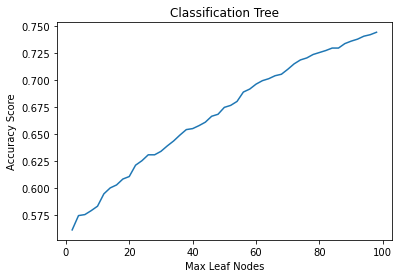

Best Accuracy Score: 0.744505
Best Max Leaf Nodes: 98.000000
[[727 372]
 [186 899]]
Confusion Matrix
***************
---------------
| 0 | 727 | 372 |
| 1 | 186 | 899 |
['Row Id', 'Row Id.', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5', 'homeowner dummy', 'NUMCHLD', 'INCOME', 'gender dummy', 'WEALTH', 'HV', 'Icmed', 'Icavg', 'IC15', 'NUMPROM', 'RAMNTALL', 'MAXRAMNT', 'LASTGIFT', 'totalmonths', 'TIMELAG', 'AVGGIFT']
TARGET_D
  Data Set       Shape
0  train_x  (2184, 22)
1  valid_x   (936, 22)
2  train_y     (2184,)
3  valid_y      (936,)
          Predictor  coefficient
0            Row Id     0.002295
1           Row Id.    -0.000272
2      zipconvert_2     6.244983
3      zipconvert_3     6.062890
4      zipconvert_4     7.003710
5      zipconvert_5     6.125585
6   homeowner dummy     0.040593
7           NUMCHLD    -0.565367
8            INCOME     0.208202
9      gender dummy    -0.244033
10           WEALTH    -0.043871
11               HV     0.000281
12        

In [1]:

# importing all necessary packages

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #, Lasso, Ridge, LassoCV,BayesianRidge
import statsmodels.formula.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree
import numpy as np

from graphviz import Digraph
from graphviz import Source
from sklearn import tree

import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline
from dmba import AIC_score #, BIC_score, adjusted_r2_score
# 1. Please explore the data and variables by checking their values, types, distributions, missing values, etc


Fundraising_df = pd.read_csv('/Users/adviti/Downloads/Fundraising.csv')


Fundraising_df.head()

# printing number of rows and columns:
    
# format(Fundraising_df.shape[0] , Fundraising_df.shape[1])
print(Fundraising_df.describe())

print("the size and shape of the data set are:")
print("Shape of the dataframe: ", Fundraising_df.shape)
print("Size of the dataframe: ",Fundraising_df.size)

# printing each variables's values:

print(Fundraising_df.values)

# printing each variable type:
print(Fundraising_df.dtypes)

# Printing the distributions variable:

print(Fundraising_df.value_counts().describe())

# Printing the missing values:

numb = Fundraising_df.columns[Fundraising_df.dtypes != 'object']
cat = Fundraising_df.columns[Fundraising_df.dtypes == 'object']
print("The number of missing values are:")
print(Fundraising_df[numb].isnull().sum().sort_values(ascending=False))

print("There are no missing values in the dataset")

# 2. build a decision tree model to predict TARGET_B using Fundraising.csv

# Split the data into training (70%) and validation (30%)
Fundraising_df.columns.tolist()

predictors = ['Row Id','Row Id.',
 'zipconvert_2',
 'zipconvert_3',
 'zipconvert_4',
 'zipconvert_5',
 'homeowner dummy',
 'NUMCHLD',
 'INCOME',
 'gender dummy',
 'WEALTH',
 'HV',
 'Icmed',
 'Icavg',
 'IC15',
 'NUMPROM',
 'RAMNTALL',
 'MAXRAMNT',
 'LASTGIFT',
 'totalmonths',
 'TIMELAG',
 'AVGGIFT'] 
print("the predictors are: ", predictors)

# define outcome/target variable
outcome = 'TARGET_B'
print(outcome)



# Removing k-1 dummies 
x = pd.get_dummies(Fundraising_df[predictors], drop_first=True) 

x.dtypes

y = Fundraising_df[outcome]
y.head()



# Data splicing:
    
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3,random_state=1) 
train_x.head()

# Checking the training and validation data sets
testing={'Data Set':['train_x', 'valid_x','train_y','valid_y'], 'Shape': [train_x.shape, valid_x.shape, train_y.shape, valid_y.shape]}
df=pd.DataFrame(testing)
print(df)



# Building a tree model:
    
Tree = DecisionTreeClassifier()
Tree.fit(train_x, train_y)

plotDecisionTree(Tree, feature_names=train_x.columns)

tree = Tree
print('Number of nodes', tree.tree_.node_count)

# Writing the confusion matrix to measure the tree model's accuracy:
    
# Accuracy on the training data:
print("Accuracy on the training data:")    
classificationSummary(train_y, Tree.predict(train_x))

# Accuracy on the validation data:
print("Accuracy on the validation data: ")  
classificationSummary(valid_y, Tree.predict(valid_x))

# Five-fold cross-validation of the full decision tree classifier:
    
Classifier = DecisionTreeClassifier()

scores = cross_val_score(Classifier, train_x, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
# range of two times of standard deviation
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

# range of standard deviation
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

# performing GridsearchCV :

# defining the numbers of hidden layer sizes :
smalTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smalTree.fit(train_x, train_y)
plotDecisionTree(smalTree, feature_names=train_x.columns)


classificationSummary(train_y, smalTree.predict(train_x))
classificationSummary(valid_y, smalTree.predict(valid_x))


param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(train_x, train_y)

print('Initial score: ', grid.best_score_)
print('Initial parameters: ', grid.best_params_)

# Adapt grid based on result from initial grid search

param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

best = gridSearch.best_estimator_

plotDecisionTree(best, feature_names=train_x.columns)

# check model's accuracy
print("check model's accuracy: ")
classificationSummary(train_y, best.predict(train_x))
classificationSummary(valid_y, best.predict(valid_x))



# Using the tree model to predict Target_B (the target variable) for both the training data and validation data.
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
leaf= np.arange(2, 100, 2)
scores = []
mae_tra = []
mae_test=[]
bscore = 0
bleaf = 0
for l in leaf:
    clf = DecisionTreeClassifier(max_leaf_nodes=l)
    clf.fit(train_x, train_y)
    y_pred = clf.predict(train_x)
    score = accuracy_score(train_y, y_pred)
    scores.append(score)
    


    if score > bscore:
        bscore = score
        bleaf = l
    
scores = np.array(scores)

# plot the results
plt.plot(leaf, scores)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Classification Tree")
plt.show()



print("Best Accuracy Score: %f" % bscore)
print("Best Max Leaf Nodes: %f" % bleaf)

# Creating a confusion matrix to measure the model’s performance on the training and validation data sets.

# now we want to display the confusion matrix
cmatrix = confusion_matrix(train_y, y_pred)
print(cmatrix)
print("Confusion Matrix")
print("***************")
print("---------------")
print("| 0 | %i | %i |" % (cmatrix[0][0], cmatrix[0][1]))
print("| 1 | %i | %i |" % (cmatrix[1][0], cmatrix[1][1]))


# 2.	TARGET_D
# Please build a regression model to predict TARGET_D if the person donated.  Use Fundraising.csv file to build and test the model. Please assess your model’s performance (accuracy function)
TargetD_df = pd.read_csv('/Users/adviti/Downloads/Fundraising.csv')
# Split the data into training (70%) and validation (30%):

TargetD_df.columns.tolist()

# Including all variables (except TARGET_D) as predictors to predict the target variable TARGET_D if they made donations or not.:

predictors = ['Row Id','Row Id.',
 'zipconvert_2',
 'zipconvert_3',
 'zipconvert_4',
 'zipconvert_5',
 'homeowner dummy',
 'NUMCHLD',
 'INCOME',
 'gender dummy',
 'WEALTH',
 'HV',
 'Icmed',
 'Icavg',
 'IC15',
 'NUMPROM',
 'RAMNTALL',
 'MAXRAMNT',
 'LASTGIFT',
 'totalmonths',
 'TIMELAG',
 'AVGGIFT'] 
print(predictors)

# define outcome/target variable
outcome = 'TARGET_D'
print(outcome)


# Removing k-1 dummies 
x = pd.get_dummies(TargetD_df[predictors], drop_first=True) 

x.dtypes

y = TargetD_df[outcome]
y.head()

# I am performing LinearRegrresion()

# split the data training (70%) vs. validation (30%)
# random_state=1: Pass an int for reproducible output across multiple function calls
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3,random_state=1) 
train_x.head()

# check training and validation data sets
data={'Data Set':['train_x', 'valid_x','train_y','valid_y'], 'Shape': [train_x.shape, valid_x.shape, train_y.shape, valid_y.shape]}
df2=pd.DataFrame(data)
print(df2)

#build linear regression model using the training data
RegressionTargetD = LinearRegression()
RegressionTargetD.fit(train_x, train_y)

#predecting the test set results
y_pred = RegressionTargetD.predict(train_x)

#Visualization of the training set results
pt.scatter(train_x, train_y, color = 'red')
pt.plot(train_x, RegressionTargetD.predict(train_x), color = 'green')
pt.title('Predictors vs Target_D')
pt.xlabel('Predictors')
pt.ylabel('Target_D')
pt.show()

# print coefficients
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': RegressionTargetD.coef_}))


    
# Assessing and comparing the model’s performance on the training data and validation data (accuracy function())

# print performance measures (training data)
regressionSummary(train_y, RegressionTargetD.predict(train_x))
regressionSummary(valid_y, RegressionTargetD.predict(valid_x))

# finding the accuracy score:

accuracy_score = AIC_score(valid_y, RegressionTargetD.predict(valid_x),RegressionTargetD)
print("The accuracy score of the linearregression model is: ", accuracy_score/100,'%')